<div align = "center"><font size = "5"> 7CCSMQMF Python Coding Coursework</font></div>  

<div align = "center"><font size = "4">  November 2023 </font></div>  

<div align = "center"><font size = "4">  k23075825 Yi-Lung (Dragon) Tsai </font></div>  

*** 


# <font color='navy'> Introduction and Initial Simulation </font>

###　Monte Carlo Option Pricing
* We can thus simulate the security price under the risk-neutral measure (i.e., with drift r) and compute the expected intrinsic value of the option at time T, and discount it back to time 0 by multiplying it with $e^{−rT}$.
* We repeat this many times, we compute the average over all the resulting sample prices, which yields an approximation to the theoretically fair option price.
* The payoff of an *Asian (Average Value) Option* is path dependent, so now we need to simulate intermediate values of $S_t$.

### Path-Dependent Monte Carlo Option Pricing
To simulate GBM at $M$ evenly spaced time intervals $t_i$ with $Δ=T/M$:

$S_{tk}=S_0⋅exp(\sum_{i=1}^{k} σ\sqrt{Δ}z_i+(μ−σ^2/2)Δ)$ 

### Algorithm for Path-Dependent Option Pricing
1. Draw $I⋅M$ random numbers from the standard normal distribution.


2. For $i∈{1,2,…,I}$:

    i). Calculate underlying value at times $t_i ∈${$Δ,2Δ,…,MΔ=T$} by simulating geometric Brownian motion with drift $μ=r$ and  volatility $σ$ using the equation for $S_{tk}$.

    ii). Estimate the average value of the option $\hat h_T= \frac{1}{M}\sum_{i=1}^{M} S_{ti}$.

    iii). Compute the intrinsic value of the option $h_T=max${$\hat h_T−K,0$}.
    
    iv). Discount back to the present at the risk-free rate r, giving the present value:  $C_i=e^{−rT} h_T$.
3. Output the final estimate by computing the Monte Carlo estimator  $\bar C=\frac{\sum_{i=1}^{I} C_i}{I}$.

*** 

### Asian Options in Financial Derivatives

An **Asian option** is a distinctive type of financial derivative that falls under the category of options. Unlike European or American options, the key feature of an Asian option is its settlement price, which is linked to the average of the asset's prices over a specified period.

The settlement price of an Asian option is determined based on the average price of the underlying asset during a specified period. This period could span several days, weeks, or even months. The unique characteristic of Asian options allows them to mitigate the impact of market volatility on option prices to some extent, as they focus on the average price rather than the price at a specific moment.

### Types of Asian Options

Asian options are typically categorized into two main types:

#### 1. Fixed-Strike Asian Options

The settlement price of a *fixed-strike Asian option* is determined by comparing the average price during the contract period with a predetermined strike price. This type provides a structured approach to pricing and settlement.

#### 2. Floating-Strike Asian Options

On the other hand, the settlement price of a *floating-strike Asian option* is related to the relative changes in the average price. This dynamic approach can offer flexibility in response to market conditions.

### Purpose and Benefits

The design of Asian options is intended to address situations with significant market price fluctuations. By considering the average price over time, investors using Asian options gain an alternative strategy and risk management tool in the realm of options trading. This approach provides a more measured response to market dynamics, offering potential advantages in times of uncertainty.

*** 


### Task
Use the expected value of the discounted payoff under the risk-neutral density $Q$.

$V (S; t) = e^{-r(T-t)}$E$^{Q}$[Payoff$(S_T)]$

As an initial example, I will use the following set of sample data.
   * Today's stock price $S_0$ = 100
   * Strike $E$ = 100
   * Time to expiry $(T-t)$ = 1 year
   * volatility $σ$ = 20%
   * constant risk-free interest rate $r$ = 5%


#### 1. Asian fixed strike call options
> Payoff = Max(Average Price - Strike Price, 0)

In [1]:
import numpy as np
from scipy.stats import gmean
import pandas as pd

def asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I, average_method = "Arithmetic average"):
    dt = T / M

    # Simulate I paths with M time steps
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))

    columns = [f'stock_{i + 1}' for i in range(I)]
    df_S = pd.DataFrame(S, columns=columns)

    # Calculate the Monte Carlo estimator
    if average_method == "Geometric average":
        C0 = np.exp(-r * T) * np.maximum(gmean(S, axis=0) - K, 0)
        return np.mean(C0)
    else:
        C0 = np.exp(-r * T) * np.maximum(np.mean(df_S, axis=0) - K, 0)
        return np.mean(C0)


# initial example:
S0 = 100  # Today's stock price
K = 100  # Strike
T = 1  # Time to expiry (T-t) 1 year
sigma = 0.2  # Volatility = 20%
r = 0.05  # Constant risk-free interest rate r = 5%
M = 252  # Time steps
I = 10000  # Number of independent paths

print(" Estimated PV of Asian fixed strike PO(call)-Arithmetic Average :", asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I))
print(" Estimated PV of Asian fixed strike PO(call)-Geometric Average :", asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I, average_method = "Geometric average"))

 Estimated PV of Asian fixed strike PO(call)-Arithmetic Average : 5.708408712269548
 Estimated PV of Asian fixed strike PO(call)-Geometric Average : 5.631489518721778


#### 2. Asian fixed strike put options
> Payoff = Max(Strike Price - Average Price, 0)

In [2]:
import numpy as np
from scipy.stats import gmean
import pandas as pd

def asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I, average_method = "Arithmetic average"):
    dt = T / M

    # Simulate I paths with M time steps
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))

    columns = [f'stock_{i + 1}' for i in range(I)]
    df_S = pd.DataFrame(S, columns=columns)

    # Calculate the Monte Carlo estimator
    if average_method == "Geometric average":
        P0 = np.exp(-r * T) * np.maximum(K - gmean(S, axis=0), 0)
        return np.mean(P0)
    else:
        P0 = np.exp(-r * T) * np.maximum(K - np.mean(df_S, axis=0), 0)
        return np.mean(P0)


# initial example:
S0 = 100  # Today's stock price
K = 100  # Strike
T = 1  # Time to expiry (T-t) 1 year
sigma = 0.2  # Volatility = 20%
r = 0.05  # Constant risk-free interest rate r = 5%
M = 252  # Time steps
I = 10000  # Number of independent paths

print(" Estimated PV of Asian fixed strike PO(put)-Arithmetic Average :", asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I))
print(" Estimated PV of Asian fixed strike PO(put)-Geometric Average :", asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I, average_method = "Geometric average"))

 Estimated PV of Asian fixed strike PO(put)-Arithmetic Average : 3.3607003508614324
 Estimated PV of Asian fixed strike PO(put)-Geometric Average : 3.481598949645424


#### 3. Asian floating strike call options
> Payoff = Max(Final Price - Average Price, 0)

In [3]:
import numpy as np
from scipy.stats import gmean
import pandas as pd

def asian_floating_strike_option_pricing(S0, T, sigma, r, M, I, average_method = "Arithmetic average"):
    dt = T / M

    # Simulate I paths with M time steps
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))

    columns = [f'stock_{i + 1}' for i in range(I)]
    df = pd.DataFrame(S, columns=columns)
    Last_value = df.iloc[-1, :]

    # Calculate the Monte Carlo estimator
    if average_method == "Geometric average":
        C0 = np.exp(-r * T) * np.maximum(Last_value - gmean(S, axis=0), 0)
        return np.mean(C0)
    
    else:
        C0 = np.exp(-r * T) * np.maximum(Last_value - np.mean(S, axis=0), 0)
        return np.mean(C0)


# initial example:
S0 = 100  # Today's stock price
T = 1  # Time to expiry (T-t) 1 year
sigma = 0.2  # Volatility = 20%
r = 0.05  # Constant risk-free interest rate r = 5%
M = 252  # Time steps
I = 10000  # Number of independent paths

print(" Estimated PV of Asian floating strike PO(call)-Arithmetic Average :", asian_floating_strike_option_pricing(S0, T, sigma, r, M, I))
print(" Estimated PV of Asian floating strike PO(call)-Geometric Average :", asian_floating_strike_option_pricing(S0, T, sigma, r, M, I, average_method = "Geometric average"))

 Estimated PV of Asian floating strike PO(call)-Arithmetic Average : 5.967168049035768
 Estimated PV of Asian floating strike PO(call)-Geometric Average : 5.941926573043594


#### 4. Asian floating strike put options
> Payoff = Max(Average Price - Final Price, 0)

In [4]:
import numpy as np
from scipy.stats import gmean
import pandas as pd

def asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I, average_method = "Arithmetic average"):
    dt = T / M

    # Simulate I paths with M time steps
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))

    columns = [f'stock_{i + 1}' for i in range(I)]
    df = pd.DataFrame(S, columns=columns)
    Last_value = df.iloc[-1, :]

    # Calculate the Monte Carlo estimator
    if average_method == "Geometric average":
        P0 = np.exp(-r * T) * np.maximum(gmean(S, axis=0)- Last_value , 0)
        return np.mean(P0)
    else:
        P0 = np.exp(-r * T) * np.maximum(np.mean(S, axis=0) - Last_value, 0)
        return np.mean(P0)


# initial example:
S0 = 100  # Today's stock price
T = 1  # Time to expiry (T-t) 1 year
sigma = 0.2  # Volatility = 20%
r = 0.05  # Constant risk-free interest rate r = 5%
M = 252  # Time steps
I = 10000  # Number of independent paths

print(" Estimated PV of Asian floating strike PO(put)-Arithmetic Average :", asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I))
print(" Estimated PV of Asian floating strike PO(put)-Geometric Average :", asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I, average_method = "Geometric average"))

 Estimated PV of Asian floating strike PO(put)-Arithmetic Average : 3.353295526305791
 Estimated PV of Asian floating strike PO(put)-Geometric Average : 3.207874331803897


> *Explanations: As evident from the preceding analysis, the majority of the findings suggest that Arithmetic average Asian options generally exhibit higher premiums in contrast to Geometric average Asian options. This divergence is attributed to the mitigating effect of the geometric average on significant price swings, leading to a reduction in the implied volatility associated with the option.*

### Supershare Options in Financial Derivatives

A **Supershare option** belongs to the category of binary options. Unlike a typical binary option where the payout is a fixed dollar amount if the underlying asset surpasses or falls below the strike price, a Supershare option introduces both a lower and upper boundary.

In the case of a Supershare option, if the underlying asset falls within the specified boundaries at the expiration, the payoff is determined by the ratio of the underlying asset's value to the lower boundary:

**Payoff = Underlying / Lower Boundary**

However, if the underlying asset is outside these established boundaries at expiration, the payoff is zero.
> *Below is a chart explaining the concepts mentioned above.*

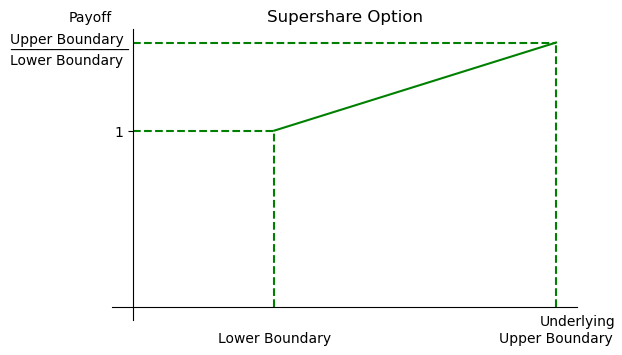

In [5]:
import matplotlib.pyplot as plt

x = [0.8, 2.4]
y = [1, 1.5]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, y, color='green')

ax.plot([0.8, 0.8], [0, 1], color='green', linestyle='--')  
ax.plot([0, 0.8], [1, 1], color='green', linestyle='--')    
ax.plot([2.4, 2.4], [0, 1.5], color='green', linestyle='--')  
ax.plot([0, 2.4], [1.5, 1.5], color='green', linestyle='--')  


ax.text(-0.7, 1.4, 'Lower Boundary', verticalalignment='center')
ax.text(-0.7, 1.50, '_________________', verticalalignment='center')
ax.text(-0.7, 1.52, 'Upper Boundary', verticalalignment='center')

ax.text(0.8, -0.2, 'Lower Boundary', horizontalalignment='center')
ax.text(2.4, -0.2, 'Upper Boundary', horizontalalignment='center')

ax.set_xlabel('Underlying')
ax.set_ylabel('Payoff', rotation=0, horizontalalignment='right')  
ax.set_title('Supershare Option')

ax.spines['left'].set_position('zero')  
ax.spines['bottom'].set_position('zero')  
ax.spines['right'].set_color('none')  
ax.spines['top'].set_color('none')  

ax.set_xticks([])  
ax.set_yticks([1])  


ax.xaxis.set_label_coords(1.001, 0.02)  
ax.yaxis.set_label_coords(0, 1.02)  
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--', color='green')  
ax.yaxis.grid(False)  
plt.show()


### Supershare Options Pricing
A supershare option, originally introduced by Hakansson (1976), entitles its holder to a payoff of $S/X_L$ if $X_L$ &le; $S$ < $X_H$ and 0 otherwise.

> **Formula**:        $w = (Se^{(b-r)T} / X_L)$ [$N(d_1)-N(d_2)$]
>
>     where   
> $d_1$ = $\frac{ln(S/X_L) + (b+σ^2/2)T}{σ\sqrt{T}}$      $d_2$ = $\frac{ln(S/X_H) + (b+σ^2/2)T}{σ\sqrt{T}}$ 

### Task

> As an initial example, I will evaluate the outcomes using the criteria specified by Haug, E. G. in the year 2007.

   * Future price $S$ = 100
   * Lower boundary $X_L$ = 90
   * Upper boundary $X_H$ = 110
   * Time to expiry $(T-t)$ = 3 months
   * Volatility $σ$ = 20%
   * Risk-free interest rate $r$ = 10% per year
   * Basis $b$ = 0
   
   
#### 5. Supershare options

In [6]:
import scipy as sp
import numpy as np

S = 100
X_L = 90
X_H = 110
T = 0.25
r = 0.1
b = 0
sigma = 0.2

d_1 = (np.log(S/X_L) + (b + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
d_2 = (np.log(S/X_H) + (b + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
W_F = (S*np.exp((b-r) * T)/X_L) * (sp.stats.norm.cdf(d_1) - sp.stats.norm.cdf(d_2))

print('Supershare Option price by formula: ', W_F)


Supershare Option price by formula:  0.7389401287052355


In [7]:
import numpy as np
import pandas as pd

def supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H):
    dt = T / M

    # Simulate I paths with M time steps
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))

    S = np.where(S < X_L,0, S)
    S = np.where(S >= X_H,0, S)
    columns = [f'stock_{i + 1}' for i in range(I)]
    df = pd.DataFrame(S, columns=columns)
    Last_value = df.iloc[-1, :]
    
    
    # Calculate the Monte Carlo estimator
    W_S = np.exp(-r * T) * (Last_value/X_L)
    return np.mean(W_S)


# initial example:
S0 = 100  # Today's stock price
T = 0.25  # Time to expiry (T-t) 1 year
sigma = 0.2  # Volatility = 20%
r = 0.1  # Constant risk-free interest rate r = 10%
M = 63  # Time steps
I = 10000  # Number of independent paths
X_L = 90 #lower boundary
X_H = 110 #upper boundary

print('Supershare Option price by simulation: ', supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H))

Supershare Option price by simulation:  0.7343766379161061


> *Conclusion: The outcomes of the simulation closely align with the values of the derivatives formula.*

# <font color='navy'> Results - Tables and Comparisons </font>

### Examine the impact of various parameters on the outcomes of Asian options

#### 1. Compare different risk-free interest rate $r$  from 1% ~ 10% with step 0.002

In [8]:
r_values = np.arange(0.01, 0.1, 0.002) # We adjust the risk-free interest rate r

def parameter_adjust(r_values):
    asian_fix_call = []
    asian_fix_put = []
    asian_float_call = []
    asian_float_put = []
    for r in r_values:
        S0 = 100  # Today's stock price
        K = 100  # Strike
        T = 1  # Time to expiry (T-t) 1 year
        sigma = 0.2  # Volatility = 20%
        M = 252  # Time steps
        I = 10000  # Number of independent paths
        asian_fix_call.append(asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I))
        asian_fix_put.append(asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I))
        asian_float_call.append(asian_floating_strike_option_pricing(S0, T, sigma, r, M, I))
        asian_float_put.append(asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I))
    return asian_fix_call, asian_fix_put, asian_float_call, asian_float_put

asian_fix_call, asian_fix_put, asian_float_call, asian_float_put = parameter_adjust(r_values) 

C:\Users\user\AppData\Local\Temp\ipykernel_26700\1015415174.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


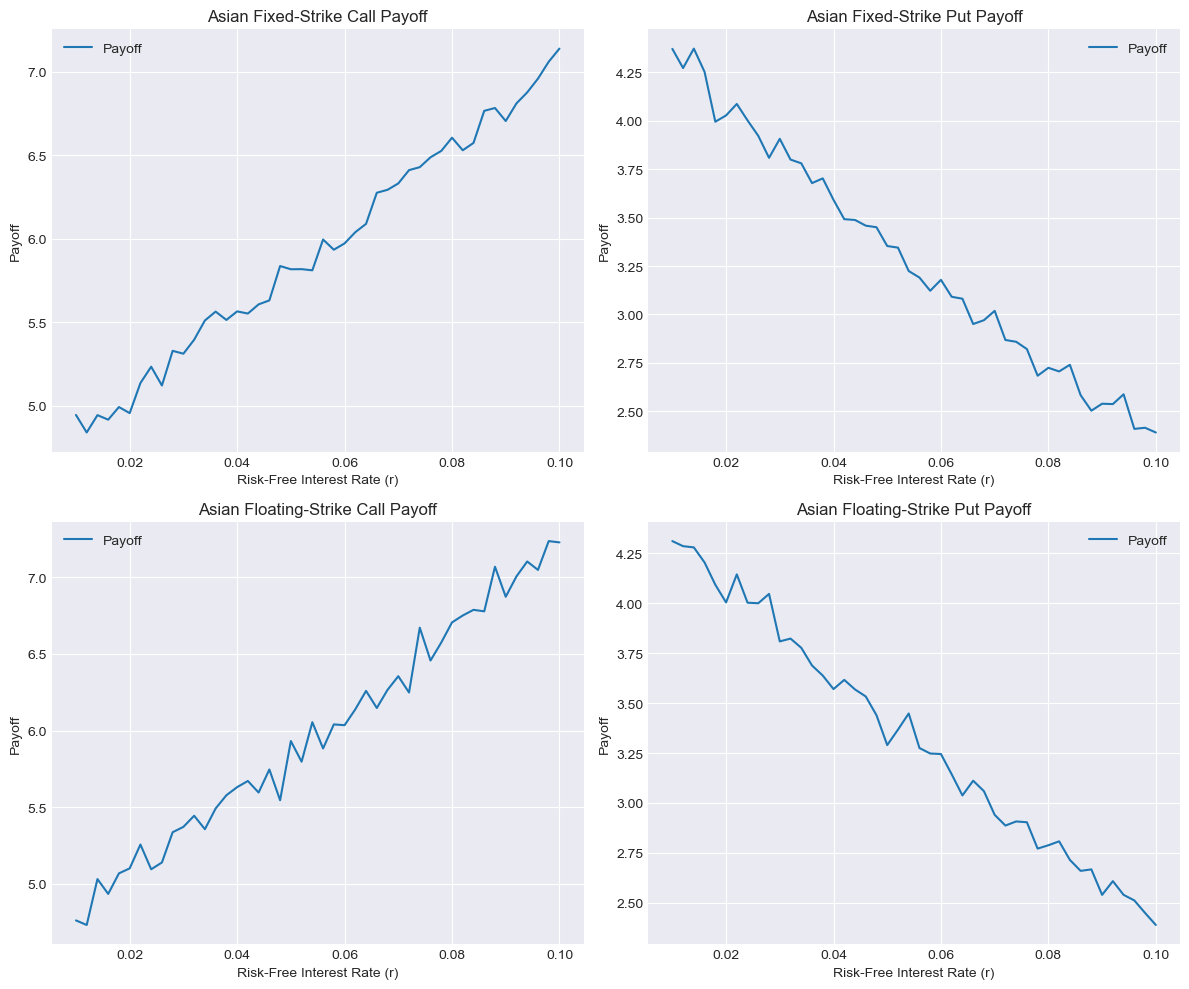

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('seaborn-darkgrid')


fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0, 0].set_title('Asian Fixed-Strike Call Payoff')
axes[0, 1].set_title('Asian Fixed-Strike Put Payoff')
axes[1, 0].set_title('Asian Floating-Strike Call Payoff')
axes[1, 1].set_title('Asian Floating-Strike Put Payoff')


axes[0, 0].plot(r_values, asian_fix_call, label='Payoff')
axes[0, 1].plot(r_values, asian_fix_put, label='Payoff')
axes[1, 0].plot(r_values, asian_float_call, label='Payoff')
axes[1, 1].plot(r_values, asian_float_put, label='Payoff')


axes[0, 0].set_xlabel('Risk-Free Interest Rate (r)')
axes[0, 0].set_ylabel('Payoff')
axes[0, 1].set_xlabel('Risk-Free Interest Rate (r)')
axes[0, 1].set_ylabel('Payoff')
axes[1, 0].set_xlabel('Risk-Free Interest Rate (r)')
axes[1, 0].set_ylabel('Payoff')
axes[1, 1].set_xlabel('Risk-Free Interest Rate (r)')
axes[1, 1].set_ylabel('Payoff')


axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()


plt.tight_layout()


plt.show()


> *Explanations: As the interest rate r increases, two distinct patterns emerge: the price of Asian call options rises, and the price of Asian put options falls.*

#### 2. Compare different volatility $σ$ from 10% ~ 100% with step 0.02

In [10]:
sigmas = np.arange(0.1, 1, 0.02) # We adjust the volatility

def parameter_adjust(sigmas):
    asian_fix_call = []
    asian_fix_put = []
    asian_float_call = []
    asian_float_put = []
    for sigma in sigmas:
        S0 = 100  # Today's stock price
        K = 100  # Strike
        T = 1  # Time to expiry (T-t) 1 year
        r = 0.05   # Constant risk-free interest rate r = 5%
        M = 252  # Time steps
        I = 10000  # Number of independent paths
        asian_fix_call.append(asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I))
        asian_fix_put.append(asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I))
        asian_float_call.append(asian_floating_strike_option_pricing(S0, T, sigma, r, M, I))
        asian_float_put.append(asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I))
    return asian_fix_call, asian_fix_put, asian_float_call, asian_float_put

asian_fix_call, asian_fix_put, asian_float_call, asian_float_put = parameter_adjust(sigmas) 

C:\Users\user\AppData\Local\Temp\ipykernel_26700\1509962677.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


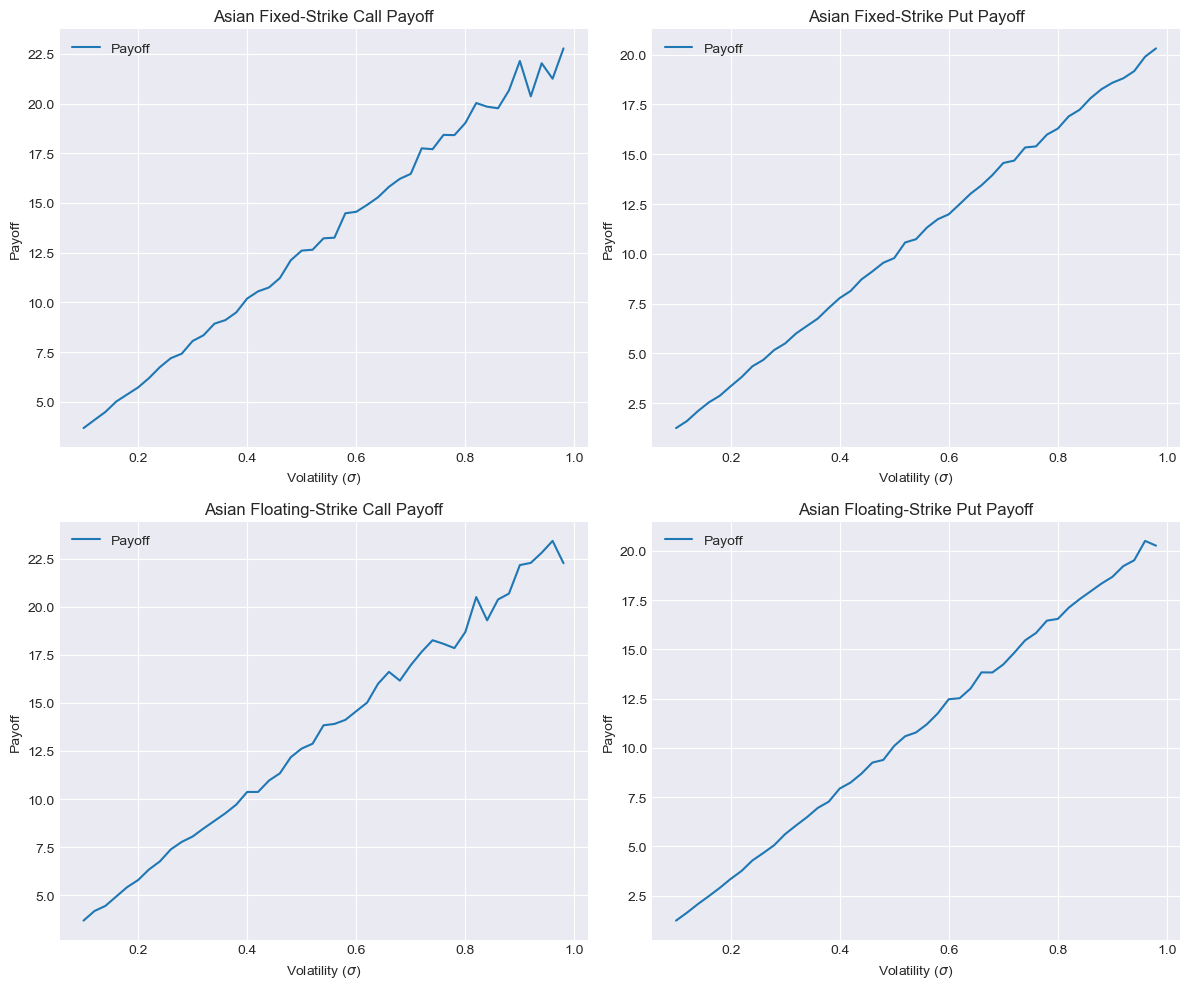

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title('Asian Fixed-Strike Call Payoff')
axes[0, 1].set_title('Asian Fixed-Strike Put Payoff')
axes[1, 0].set_title('Asian Floating-Strike Call Payoff')
axes[1, 1].set_title('Asian Floating-Strike Put Payoff')

axes[0, 0].plot(sigmas, asian_fix_call, label='Payoff')
axes[0, 1].plot(sigmas, asian_fix_put, label='Payoff')
axes[1, 0].plot(sigmas, asian_float_call, label='Payoff')
axes[1, 1].plot(sigmas, asian_float_put, label='Payoff')

axes[0, 0].set_xlabel('Volatility ($\sigma$)')
axes[0, 0].set_ylabel('Payoff')
axes[0, 1].set_xlabel('Volatility ($\sigma$)')
axes[0, 1].set_ylabel('Payoff')
axes[1, 0].set_xlabel('Volatility ($\sigma$)')
axes[1, 0].set_ylabel('Payoff')
axes[1, 1].set_xlabel('Volatility ($\sigma$)')
axes[1, 1].set_ylabel('Payoff')

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

plt.tight_layout()

plt.show()


> *Explanations: The increase in Volatility ($\sigma$) causes a corresponding rise in the prices of Asian options. This creates a linear improvement in payoff, causing the expected option price to increase proportionally.* 

#### 3. Compare different time to expiry T from 1 year to 15 year with step 1

In [12]:
T_s = np.arange(1, 15, 1) # We adjust the Time to expiry 

def parameter_adjust(T_s):
    asian_fix_call = []
    asian_fix_put = []
    asian_float_call = []
    asian_float_put = []
    for T in T_s:
        S0 = 100  # Today's stock price
        K = 100  # Strike
        sigma = 0.2  # Volatility = 20%
        r = 0.05   # Constant risk-free interest rate r = 5%
        M = 252  # Time steps
        I = 10000  # Number of independent paths
        asian_fix_call.append(asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I))
        asian_fix_put.append(asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I))
        asian_float_call.append(asian_floating_strike_option_pricing(S0, T, sigma, r, M, I))
        asian_float_put.append(asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I))
    return asian_fix_call, asian_fix_put, asian_float_call, asian_float_put

asian_fix_call, asian_fix_put, asian_float_call, asian_float_put = parameter_adjust(T_s) 

C:\Users\user\AppData\Local\Temp\ipykernel_26700\4057608361.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


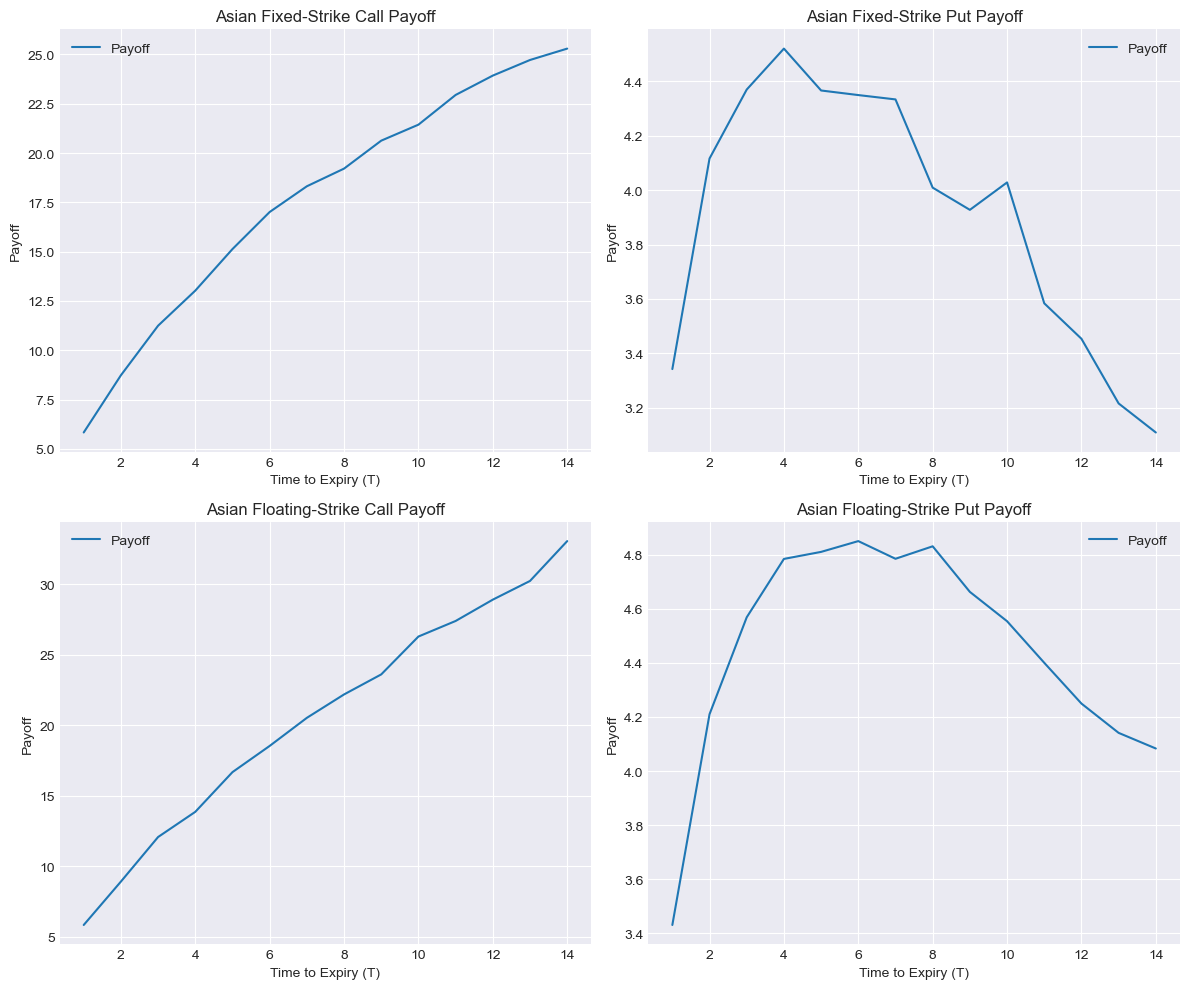

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title('Asian Fixed-Strike Call Payoff')
axes[0, 1].set_title('Asian Fixed-Strike Put Payoff')
axes[1, 0].set_title('Asian Floating-Strike Call Payoff')
axes[1, 1].set_title('Asian Floating-Strike Put Payoff')

axes[0, 0].plot(T_s, asian_fix_call, label='Payoff')
axes[0, 1].plot(T_s, asian_fix_put, label='Payoff')
axes[1, 0].plot(T_s, asian_float_call, label='Payoff')
axes[1, 1].plot(T_s, asian_float_put, label='Payoff')

axes[0, 0].set_xlabel('Time to Expiry (T)')
axes[0, 0].set_ylabel('Payoff')
axes[0, 1].set_xlabel('Time to Expiry (T)')
axes[0, 1].set_ylabel('Payoff')
axes[1, 0].set_xlabel('Time to Expiry (T)')
axes[1, 0].set_ylabel('Payoff')
axes[1, 1].set_xlabel('Time to Expiry (T)')
axes[1, 1].set_ylabel('Payoff')

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

plt.tight_layout()

plt.show()


> *Explanations: If a considerable amount of time elapses, compounding will become increasingly significant. Consequently, the likelihood of an upward movement in the final stock price will be substantially higher. Puts may experience a depreciation, but calls stand to gain even more in such a scenario.* 

#### 4. Compare different strike price $K(E)$ from 90 to 110  with step 1

In [14]:
K_s = np.arange(90, 110, 1) # We adjust the strike price

def parameter_adjust(K_s):
    asian_fix_call = []
    asian_fix_put = []
    asian_float_call = []
    asian_float_put = []
    for K in K_s:
        S0 = 100  # Today's stock price
        T = 1  # Time to expiry (T-t) 1 year
        sigma = 0.2  # Volatility = 20%
        r = 0.05   # Constant risk-free interest rate r = 5%
        M = 252  # Time steps
        I = 10000  # Number of independent paths
        asian_fix_call.append(asian_fixed_strike_option_pricing(S0, K, T, sigma, r, M, I))
        asian_fix_put.append(asian_fixed_strike_put_option_pricing(S0, K, T, sigma, r, M, I))
        asian_float_call.append(asian_floating_strike_option_pricing(S0, T, sigma, r, M, I))
        asian_float_put.append(asian_floating_strike_put_option_pricing(S0, T, sigma, r, M, I))
    return asian_fix_call, asian_fix_put, asian_float_call, asian_float_put

asian_fix_call, asian_fix_put, asian_float_call, asian_float_put = parameter_adjust(K_s) 

C:\Users\user\AppData\Local\Temp\ipykernel_26700\3791153950.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


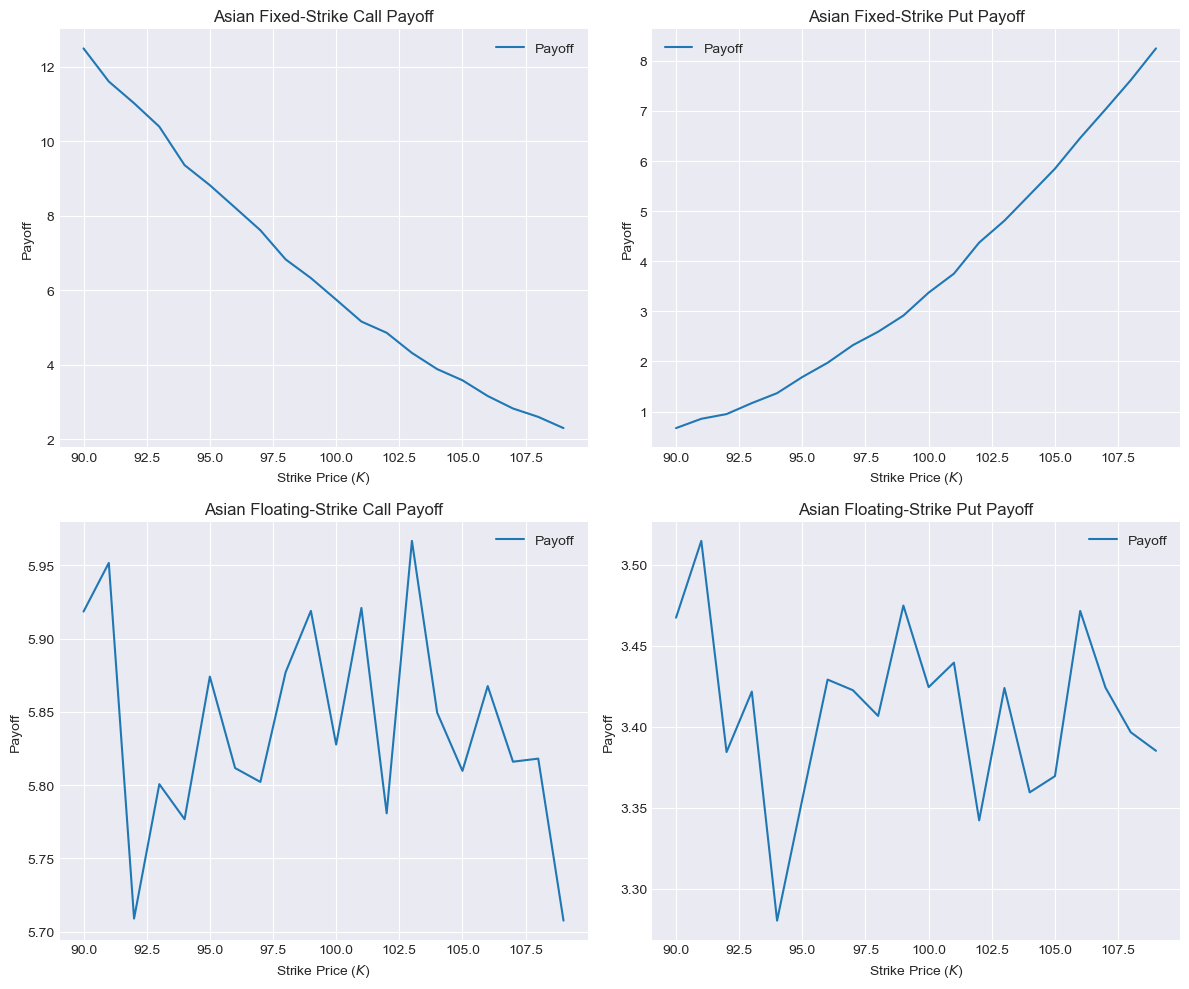

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title('Asian Fixed-Strike Call Payoff')
axes[0, 1].set_title('Asian Fixed-Strike Put Payoff')
axes[1, 0].set_title('Asian Floating-Strike Call Payoff')
axes[1, 1].set_title('Asian Floating-Strike Put Payoff')

axes[0, 0].plot(K_s, asian_fix_call, label='Payoff')
axes[0, 1].plot(K_s, asian_fix_put, label='Payoff')
axes[1, 0].plot(K_s, asian_float_call, label='Payoff')
axes[1, 1].plot(K_s, asian_float_put, label='Payoff')

axes[0, 0].set_xlabel('Strike Price ($K$)')
axes[0, 0].set_ylabel('Payoff')
axes[0, 1].set_xlabel('Strike Price ($K$)')
axes[0, 1].set_ylabel('Payoff')
axes[1, 0].set_xlabel('Strike Price ($K$)')
axes[1, 0].set_ylabel('Payoff')
axes[1, 1].set_xlabel('Strike Price ($K$)')
axes[1, 1].set_ylabel('Payoff')

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

plt.tight_layout()

plt.show()


> *Explanations: When the strike price increases, the price of Asian Fixed-Strike call options decreases, while the price of Asian Fixed-Strike put options increases. However, there is no direct impact on Asian Floating-Strike options.*

### Examine the impact of various parameters on the outcomes of SuperShare option

#### 1. Compare different risk-free interest rate $r$  from 1% ~ 10% with step 0.002

In [18]:
r_values = np.arange(0.01, 0.1, 0.002) # We adjust the risk-free interest rate r

def parameter_adjust(r_values):
    supershare_option = []
    for r in r_values:
        # initial example:
        S0 = 100  # Today's stock price
        T = 0.25  # Time to expiry (T-t) 1 year
        sigma = 0.2  # Volatility = 20%
        M = 63  # Time steps
        I = 10000  # Number of independent paths
        X_L = 90 #lower boundary
        X_H = 110 #upper boundary
        supershare_option.append(supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H))
    return supershare_option

supershare_option = parameter_adjust(r_values) 

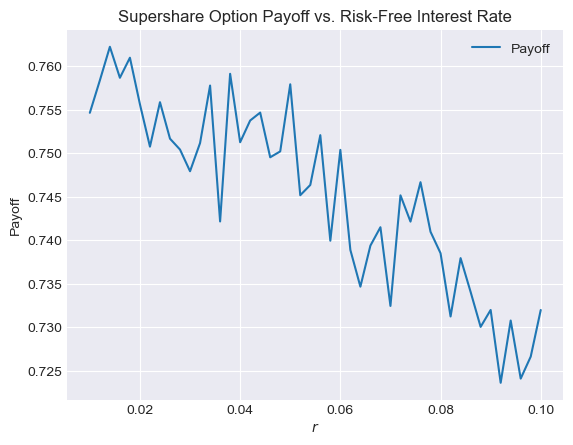

In [19]:
import matplotlib.pyplot as plt

plt.plot(r_values, supershare_option, label='Payoff')
plt.xlabel('$r$')
plt.ylabel('Payoff')
plt.title('Supershare Option Payoff vs. Risk-Free Interest Rate')
plt.legend()
plt.show()


> *Explanations: As the interest rate r increases, the price of SuperShare option falls.*

#### 2. Compare different volatility $σ$ from 10% ~ 100% with step 0.02

In [20]:
sigmas = np.arange(0.1, 1, 0.02) # We adjust the volatility

def parameter_adjust(sigmas):
    supershare_option = []
    for sigma in sigmas:
        # initial example:
        S0 = 100  # Today's stock price
        T = 0.25  # Time to expiry (T-t) 1 year
        r = 0.1  # Constant risk-free interest rate r = 10%
        M = 63  # Time steps
        I = 10000  # Number of independent paths
        X_L = 90 #lower boundary
        X_H = 110 #upper boundary
        supershare_option.append(supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H))
    return supershare_option

supershare_option = parameter_adjust(sigmas) 

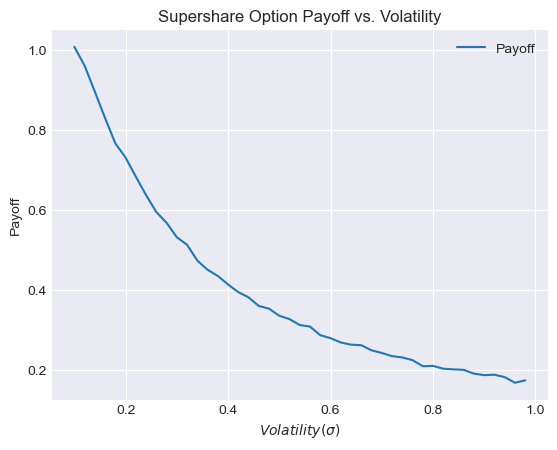

In [21]:
import matplotlib.pyplot as plt

plt.plot(sigmas, supershare_option, label='Payoff')
plt.xlabel('$Volatility (σ)$')
plt.ylabel('Payoff')
plt.title('Supershare Option Payoff vs. Volatility')
plt.legend()
plt.show()


> *Explanations: Unlike Asian options, the increase in Volatility ($\sigma$) causes a corresponding decline in the prices of SuperShare options.* 

#### 3. Compare different time to expiry T from 1 year to 15 year with step 1

In [22]:
T_s = np.arange(1, 15, 1) # We adjust the Time to expiry 

def parameter_adjust(T_s):
    supershare_option = []
    for T in T_s:
        # initial example:
        S0 = 100  # Today's stock price
        sigma = 0.2  # Volatility = 20%
        r = 0.1  # Constant risk-free interest rate r = 10%
        M = 63  # Time steps
        I = 10000  # Number of independent paths
        X_L = 90 #lower boundary
        X_H = 110 #upper boundary
        supershare_option.append(supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H))
    return supershare_option

supershare_option = parameter_adjust(T_s) 

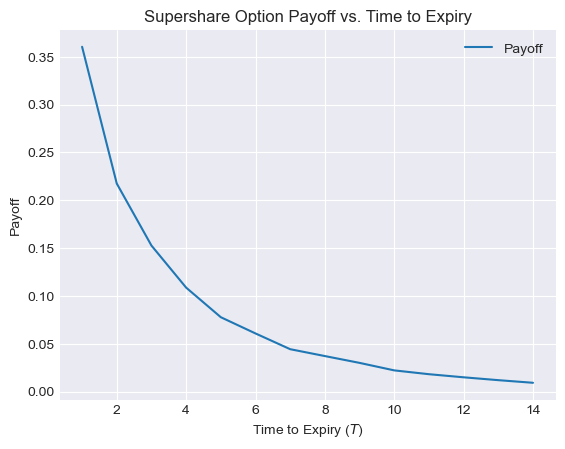

In [23]:
import matplotlib.pyplot as plt

plt.plot(T_s, supershare_option, label='Payoff')
plt.xlabel('Time to Expiry ($T$)')
plt.ylabel('Payoff')
plt.title('Supershare Option Payoff vs. Time to Expiry')
plt.legend()
plt.show()


> *Explanations: Unlike Asian options, the increase in time to expiry $T$ causes a corresponding decline in the prices of SuperShare options.* 

#### 4. Compare different range from $X_L$ to  $X_H$ 
> we let  $X_L + R = S = X_H - R$, and test $R$ from 1~75 with step 1

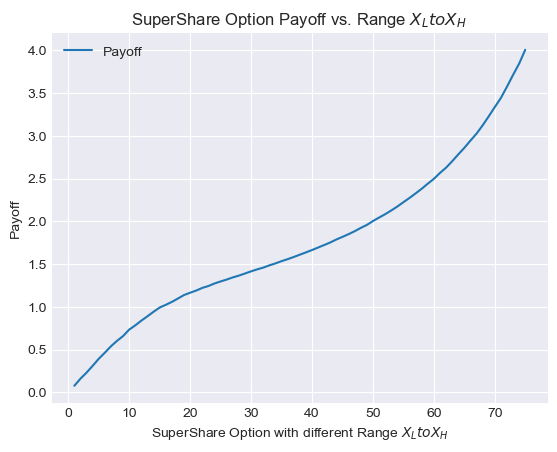

In [24]:
supershare_option = []
for R in range(1,76):
    # initial example:
    S0 = 100  # Today's stock price
    sigma = 0.2  # Volatility = 20%
    r = 0.1  # Constant risk-free interest rate r = 10%
    M = 63  # Time steps
    I = 10000  # Number of independent paths
    T = 0.25  # Time to expiry (T-t) 1 year
    X_L = S - R #lower boundary
    X_H = S + R #upper boundary
    supershare_option.append(supershare_option_pricing(S0, T, sigma, r, M, I,X_L,X_H))


plt.plot(range(1,76), supershare_option, label='Payoff')
plt.xlabel('SuperShare Option with different Range $X_L to X_H$')
plt.ylabel('Payoff')
plt.title('SuperShare Option Payoff vs. Range $X_L to X_H$ ')
plt.legend()
plt.show()

> *Explanations: As the range from $X_L$ to  $X_H$ increases, the payoff experiences an upward trend.*

# <font color='navy'> Interesting Observations and Problems Encountered </font>

### Interesting Observations

In [25]:
import pandas as pd
from tabulate import tabulate

data = {'Parameter': ['Strike Price $K$ ↑', 'Risk-Free Interest Rate $r$ ↑', 'Volatility $σ$ ↑', 'Time to Expiry $T$ ↑','Range $X_L to X_H$ ↑'],
        'Asian Fixed-Strike Call': ['Price ↓', 'Price ↑', 'Price ↑', 'Price ↑', 'No Effect'],
        'Asian Fixed-Strike Put': ['Price ↑', 'Price ↓',  'Price ↑','Price ↑↓','No Effect'],
        'Asian Floating-Strike Call': ['No Effect', 'Price ↑',  'Price ↑','Price ↑','No Effect'],
        'Asian Floating-Strike Put': ['No Effect', 'Price ↓',  'Price ↑','Price ↑↓','No Effect'],
        'SuperShare Option': ['No Effect', 'Price ↓', 'Price ↓', 'Price ↓', 'Price ↑']
       }

df = pd.DataFrame(data)
df_new = df.set_index('Parameter')
df_new

,Asian Fixed-Strike Call,Asian Fixed-Strike Put,Asian Floating-Strike Call,Asian Floating-Strike Put,SuperShare Option
Parameter,,,,,
Strike Price $K$ ↑,Price ↓,Price ↑,No Effect,No Effect,No Effect
Risk-Free Interest Rate $r$ ↑,Price ↑,Price ↓,Price ↑,Price ↓,Price ↓
Volatility $σ$ ↑,Price ↑,Price ↑,Price ↑,Price ↑,Price ↓
Time to Expiry $T$ ↑,Price ↑,Price ↑↓,Price ↑,Price ↑↓,Price ↓
Range $X_L to X_H$ ↑,No Effect,No Effect,No Effect,No Effect,Price ↑


### Problems Encountered

> 1. I searched online for definition and formula related to SuperShare, but I couldn't find content that I considered most accurate and convincing until I came across detailed cases and definitions in Chapter Four of Haug, E. G. (2007). The complete guide to option pricing formulas (Second edition.). (pp. 176) McGraw-Hill. This book helped me complete my research on SuperShare options.

> 2. Asian options are path-dependent, indicating that their payoff relies on the average price of the underlying asset over a specific timeframe. The complexity arises from the fact that the payoff is not determined by the asset's price at a single point in time. However, the approach outlined in the lecture "Scientific Computing for Finance" by Dr. Bart proved to be particularly helpful in addressing these challenges.

# <font color='navy'> Conclusion and References </font>

### Conclusion

#### In the future, I will consider utilizing Asian options and SuperShare options for trading for some reasons.

> **Risk Management:** Asian options serve as effective tools for hedging against fluctuations in the underlying asset's price. This is particularly beneficial in situations where the asset's price is volatile and challenging to predict accurately.

> **Cost Efficiency:** Asian options are generally more economical compared to standard options. This cost advantage arises from their reliance on the average price of the underlying asset over a specific time period. Consequently, this characteristic diminishes the associated risk, rendering them a more affordable choice for traders.

> **Enhanced Returns:** SuperShare options stand out by potentially offering higher returns in comparison to standard options. This is attributed to their foundation on a basket of assets rather than a single one. The diversification inherent in these options mitigates risk, potentially resulting in superior returns for traders.







### References

7CCSMSCF Scientific Computing for Finance(23~24 SEM1 000001). Monte Carlo Simulation for Option Pricing.

Haug, E. G. (2007). The complete guide to option pricing formulas (Second edition.). (pp. 176) McGraw-Hill.

James Chen (April 21, 2022). What Is an Asian Option? How They Work Vs. Standard Options. 
https://www.investopedia.com/terms/a/asianoption.asp

Resolution the authority on derivative pricing, supershare options explained.
http://www.derivativepricing.com/blogpage.asp?id=21